# 周三任务
1. 使用pytorch搭建神经网络模型，实现对KMNIST数据集的训练。
https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST
2. 尝试调整模型结构（变更神经元数量，增加隐藏层）来提升模型预测的准确率
3. 调试超参数，观察学习率和批次大小对训练的影响。

#### 1.使用KMnist数据集 训练神经网络模型

In [2]:
# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [3]:
# 定义超参数（LR：学习率 、epochs:训练次数、BATCH_SIZE：一次？数据）
LR = 1e-3
epochs = 150
BATCH_SIZE = 128

In [4]:
# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True,
                         transform=ToTensor())


c:\python_env\miniconda3\envs\py312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
  6%|▌         | 1.11M/18.2M [00:53<13:39, 20.8kB/s]


KeyboardInterrupt: 

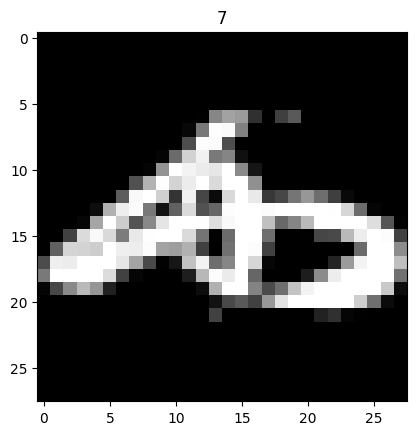

In [ ]:
import matplotlib.pyplot as plt

img,label = train_data[1]
img.numpy().shape
#去除图片的单通道， 使用图片的尺寸
plt.imshow(img.numpy().squeeze(), cmap='gray')
plt.title(label)
plt.show()

In [ ]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据

In [ ]:
# 定义模型
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10)
)

In [ ]:
# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

为什么要清除梯度，再更新参数？
因为梯度是内部运算存储的，不清除会累加，导致步长过大，可能无法很好的收敛函数，每次更新参数后，需要清除梯度，否则会影响下一次的更新。

In [ ]:
for epoch in range(epochs):
    # 提取训练数据
    for data, target in trian_dl:
        # 前向运算
        output = model(data.reshape(-1, 784))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        optimizer.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'Epoch:{epoch} Loss: {loss.item()}')

Epoch:0 Loss: 2.2949724197387695
Epoch:1 Loss: 2.2827203273773193
Epoch:2 Loss: 2.2614500522613525
Epoch:3 Loss: 2.260878562927246
Epoch:4 Loss: 2.2431552410125732
Epoch:5 Loss: 2.2188303470611572
Epoch:6 Loss: 2.2028350830078125
Epoch:7 Loss: 2.1891868114471436
Epoch:8 Loss: 2.174729585647583
Epoch:9 Loss: 2.1593434810638428
Epoch:10 Loss: 2.156759023666382
Epoch:11 Loss: 2.1055524349212646
Epoch:12 Loss: 2.101066827774048
Epoch:13 Loss: 2.0667498111724854
Epoch:14 Loss: 2.0761470794677734
Epoch:15 Loss: 2.0078113079071045
Epoch:16 Loss: 1.9736117124557495
Epoch:17 Loss: 2.000061273574829
Epoch:18 Loss: 1.9550198316574097
Epoch:19 Loss: 1.9544330835342407
Epoch:20 Loss: 1.9359760284423828
Epoch:21 Loss: 1.8944798707962036
Epoch:22 Loss: 1.8442035913467407
Epoch:23 Loss: 1.8258461952209473
Epoch:24 Loss: 1.78997004032135
Epoch:25 Loss: 1.7949461936950684
Epoch:26 Loss: 1.699066162109375
Epoch:27 Loss: 1.7932456731796265
Epoch:28 Loss: 1.6598411798477173
Epoch:29 Loss: 1.663649916648864

In [ ]:
# 测试
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

correct = 0
total = 0
with torch.no_grad():  # 不计算梯度
    for data, target in test_dl:
        output = model(data.reshape(-1, 784))
        _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
        print(predicted)
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item()

print(f'Accuracy: {correct/total*100}%')

NameError: name 'DataLoader' is not defined